# Dependencies

Feel free to modify the seed to show different images!  
Just make sure different models are compared on the same set of images.

In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
import torchvision.transforms as standard_transforms
from torch.utils.data import DataLoader
from voc import VOC

import numpy as np

from torch.utils.data import random_split

torch.manual_seed(2025)

# Mapping Class to Color

In [2]:
'''
color map
0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle # 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
'''

noToClass = {
    0:"background", 1:"aeroplane", 2:"bicycle", 3:"bird", 4:"boat", 5:"bottle", 6:"bus", 7:"car", 8:"cat", 9:"chair", 10:"cow", 11:"dining table",
12:"dog", 13:"horse", 14:"motorbike", 15:"person", 16:"potted plant", 17:"sheep", 18:"sofa", 19:"train", 20:"tv/monitor"
}

palette = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128,
           128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128,
           64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]  #3 values- R,G,B for every class. First 3 values for class 0, next 3 for

"""
    Convert palette to map class number to RGB color.

    Expected output, python dictionary with 21 integer keys, each value being a array of size 3
"""
dicti = {}
c = 0
for i in range(0,len(palette),3):
    dicti[c] = palette[i:i+3]
    c+=1

palette = dicti

# DataLoading

In [3]:
# TODO Rewrite the following transformations if needed for your models.
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
batch_size = 1

train_dataset = VOC('train', transform=img_transform, target_transform=mask_transform)
val_full_dataset = VOC('val', transform=img_transform, target_transform=mask_transform)

# 50% val → validation, 50% val → test
val_size = len(val_full_dataset) // 2
test_size = len(val_full_dataset) - val_size
val_dataset, test_dataset = torch.utils.data.random_split(val_full_dataset, [val_size, test_size])

# 用 `test_dataset` 而不是 `VOC("test")`
DL = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

first_batch = iter(DL)
imgs, masks = next(first_batch)


In [5]:
imgs, msks = [], []
for _ in range(5):
    img, msk = next(first_batch)
    imgs.append(img)
    msks.append(msk)

# Show Image

In [6]:
def makeImagesPlotReady(msk, channels = 3):
    """
    Similar to how you converted the images, make the mask tensor matplotlib ready

    args:
        msk or img - input mask tensor of shape [1, 3, 224, 224] or numpy of shape (3, 224, 224)
    returns:
        mask/img - mask that is ready to be plotted using matplotlib.
                    Hint: Numpy class of shape (224, 224, 3)
    """

    return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))

In [7]:
output_images = [makeImagesPlotReady(img, 3) for img in imgs]

/tmp/ipykernel_195036/1525982468.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


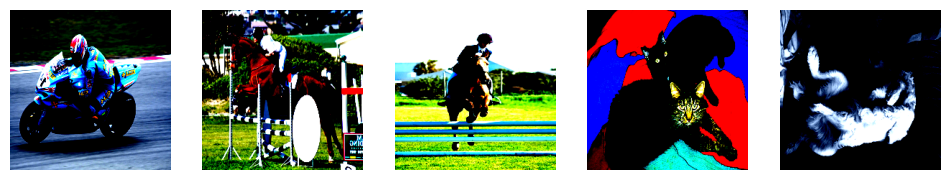

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].axis('off')
plt.show()

# Show Ground Truth Mask

In [9]:
def convertMaskToRGB(msk):
    """
    Given a msk, convert it into rgb for visulization.
    """
    msk = (msk*255).int()
    msk[msk==255]=0
    msk = msk.reshape((224, 224))
    
    mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8) # Empty array to store RGB of each class
        
    for idx, color in palette.items(): # Converting to colors
        for j in range(3): # R,G,B            
            mask_rgb[j][msk == idx] = color[j]
            
    return mask_rgb

In [10]:
output_msks = [makeImagesPlotReady(convertMaskToRGB(msk), 3) for msk in msks]

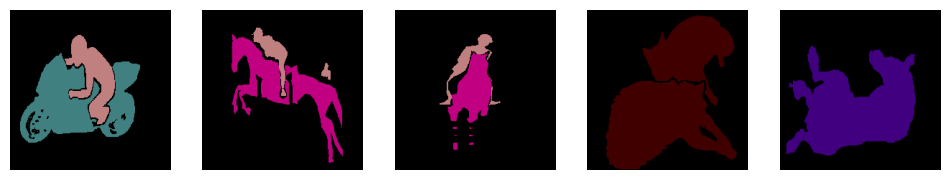

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis('off')
plt.show()

# Plot Image with the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


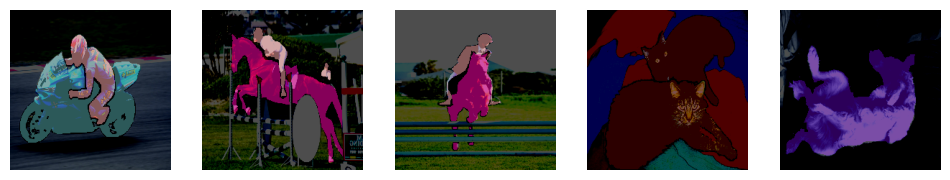

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()

# TODO: Visualize Your Model's Predicted Mask

1. Load your model
2. Use the model to predict those images to obtain masks (hint: use your exportModel function)
3. Visualize those masks (without and with images) like we did above

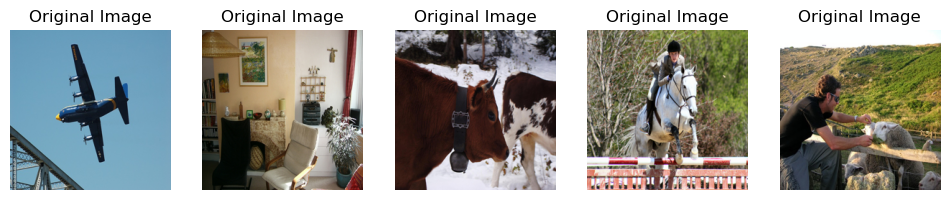

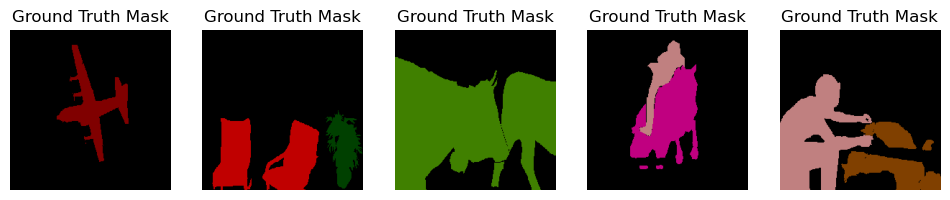

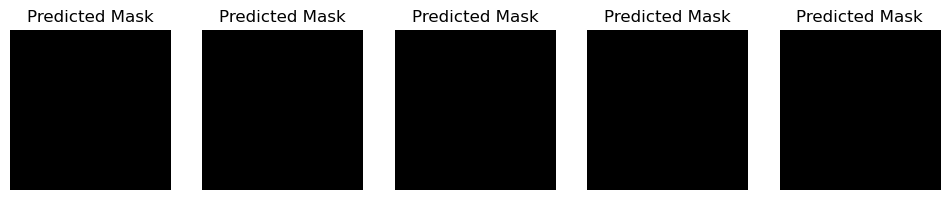

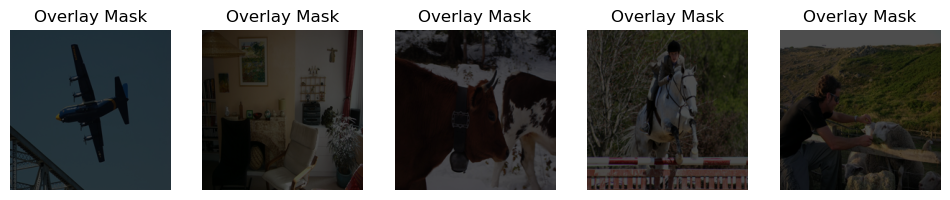

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from voc import VOC
from basic_fcn import FCN
import random

palette = {
    0: [0, 0, 0], 1: [128, 0, 0], 2: [0, 128, 0], 3: [128, 128, 0], 4: [0, 0, 128],
    5: [128, 0, 128], 6: [0, 128, 128], 7: [128, 128, 128], 8: [64, 0, 0], 9: [192, 0, 0],
    10: [64, 128, 0], 11: [192, 128, 0], 12: [64, 0, 128], 13: [192, 0, 128], 14: [64, 128, 128],
    15: [192, 128, 128], 16: [0, 64, 0], 17: [128, 64, 0], 18: [0, 192, 0], 19: [128, 192, 0], 20: [0, 64, 128]
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model_path = "best_model.pth"
n_class = 21

fcn_model = FCN(n_class=n_class)
checkpoint = torch.load(best_model_path, map_location=device)
fcn_model.load_state_dict(checkpoint["model_state_dict"])
fcn_model.to(device)
fcn_model.eval()

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

batch_size = 1
test_dataset = VOC('val', transform=img_transform, target_transform=mask_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

test_iter = iter(test_loader)
imgs, masks = [], []
for _ in range(5):
    img, mask = next(test_iter)
    imgs.append(img)
    masks.append(mask)

def denormalize(img):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = img * std + mean 
    img = np.clip(img, 0, 1)
    return img

def convert_mask_to_rgb(mask, is_ground_truth=True):
    """
    Convert a mask (224x224) into an RGB image using the VOC palette.
    
    Args:
        mask: The mask to be converted (Tensor or NumPy array).
        is_ground_truth (bool): If True, applies preprocessing needed for ground truth masks.
    """
    mask = mask.squeeze()

    if is_ground_truth:
        mask = (mask * 255).astype(np.uint8) 
        mask[mask == 255] = 0 
    else:
        mask = mask.astype(np.uint8)  

    mask_rgb = np.zeros((224, 224, 3), dtype=np.uint8)

    for idx, color in palette.items():
        mask_rgb[mask == idx] = color

    return mask_rgb

def process_mask(mask, is_ground_truth=True):
    """
    Convert a tensor mask to RGB format for visualization.
    """
    if isinstance(mask, torch.Tensor): 
        mask = mask.cpu().numpy()  
    
    if mask.ndim == 3: 
        mask = mask.squeeze(0)
    
    return convert_mask_to_rgb(mask, is_ground_truth=is_ground_truth)


predicted_masks = []
for img in imgs:
    with torch.no_grad():
        img = img.to(device)
        output = fcn_model(img)
        
        pred_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy() 
        predicted_masks.append(pred_mask) 

output_msks = [process_mask(mask, is_ground_truth=True) for mask in masks]


output_preds = [process_mask(pred_mask, is_ground_truth=False) for pred_mask in predicted_masks]


output_images = [denormalize(img.squeeze(0).cpu().numpy().transpose(1, 2, 0)) for img in imgs]


fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].set_title("Original Image")
    axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].set_title("Ground Truth Mask")
    axs[i].axis('off')
plt.show()


fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_preds)):
    axs[i].imshow(output_preds[i])
    axs[i].set_title("Predicted Mask")
    axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_preds)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_preds[i], alpha=0.7)
    axs[i].set_title("Overlay Mask")
    axs[i].axis('off')
plt.show()
